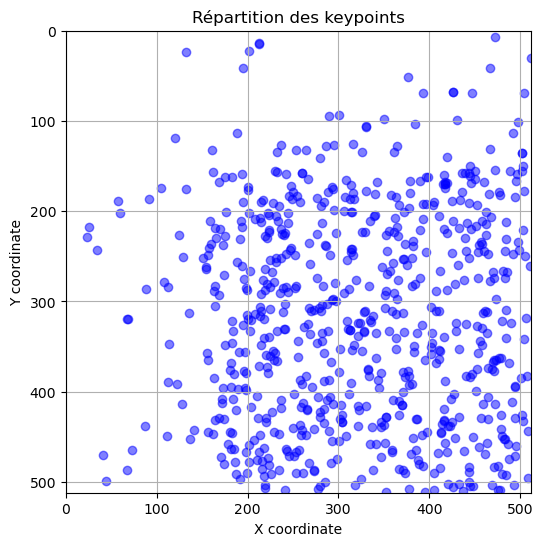

In [16]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

def plot_keypoints_from_csv(csv_path):
    """
    Charge un fichier CSV contenant une colonne 'locations' avec des keypoints [(x,y)]
    et affiche un scatterplot des keypoints sur une image de taille 512x512.
    
    Args:
    csv_path (str or Path): Chemin vers le fichier CSV.
    """
    # Charger le fichier CSV
    data = pd.read_csv(csv_path, sep=",")

    # Fonction pour extraire les keypoints sous forme de liste [(x, y)]
    def parse_locations(locations_str):
        try:
            return ast.literal_eval(locations_str)  # Convertir la chaîne en liste [(x, y)]
        except:
            return []  # Retourne une liste vide si erreur

    # Appliquer la conversion à la colonne "locations"
    data['parsed_locations'] = data['locations'].apply(parse_locations)

    # 📌 Extraire tous les keypoints
    all_keypoints = [kp for locs in data['parsed_locations'] for kp in locs]
    all_keypoints = np.array(all_keypoints) if len(all_keypoints) > 0 else np.array([])

    # 📌 Plot des keypoints sur un scatterplot
    plt.figure(figsize=(6, 6))
    if all_keypoints.size > 0:
        plt.scatter(all_keypoints[:, 0], all_keypoints[:, 1], color='blue', alpha=0.5)
    
    # Définir les axes pour correspondre à une image 512x512
    plt.xlim(0, 512)
    plt.ylim(0, 512)
    plt.gca().invert_yaxis()  # Inverser l'axe Y pour correspondre à une image

    # Ajouter des labels et un titre
    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")
    plt.title("Répartition des keypoints")
    plt.grid(True)

    # Afficher le graphique
    plt.show()


# 📌 Exemple d'utilisation
csv_path = "/home/hiphen/Documents/GCP/data/my_data/Resize_data/advanta/images_cropped/gt.csv"  # Remplace par le chemin réel du fichier CSV

plot_keypoints_from_csv(csv_path)  # Décommente pour exécuter avec ton fichier


